Machine learning model for predicting diabetes diagnosis to detect if a patient is either diabetic or not. Below contains the project implementation flow.

- Understanding the problem statement

- Data collection

- Data loading

- Data cleaning

- Exploratory Data Analysis

- Data Preparation and Preprocessing

- Model Training 

- Model Evaluation

- Selecting the best model

1. Problem Statement

This machine learning project involves building a predictive model that will be capable of predicting the diagnosis of diabetes from a patient vital data variables.

2. Data Collection 


The dataset for this project was obtained from the UCI machine learning repository. A zip file for the data was extracted and loaded to the project directory.


3. Data Loading

In [1]:
# import all the required libraries for this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

In [2]:
# create a pandas dataframe to load the diabetes dataset

diabetes_df = pd.read_csv('data\diabetes_prediction_dataset.csv')

In [3]:
# load the dataframe and view first few rows of the data records
diabetes_df.head(50)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [4]:
 # view the features and targets in the dataset
diabetes_df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [5]:
# view the dimension of the data
diabetes_df.shape

(100000, 9)

In [6]:
# overview of the dataframe
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
diabetes_df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

4. Data Cleaning

In [8]:
# check for null values/missing values

diabetes_df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [9]:
# verify duplicate rows

print(diabetes_df.duplicated().sum())

3854


In [10]:
# drop duplicate columns
diabetes_df = diabetes_df.drop_duplicates()

In [11]:
print(diabetes_df.duplicated().sum())

0


In [12]:
diabetes_df.shape

(96146, 9)

5. Exploratory Data Analysis

In [13]:
# statiscal analysis of data
diabetes_df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


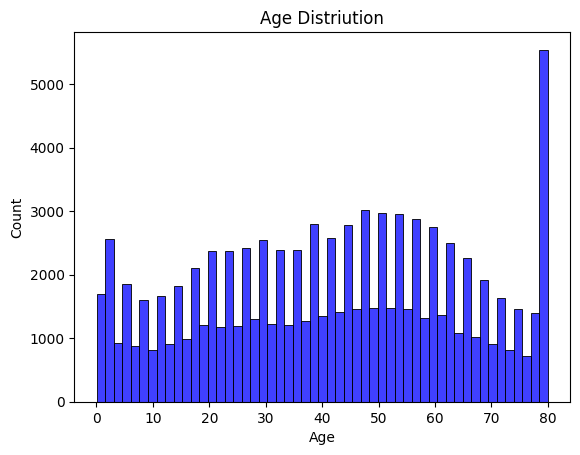

In [14]:
# Age Distribution
sns.histplot(diabetes_df['age'], color='blue')
plt.title('Age Distriution')
plt.xlabel('Age')
plt.show()

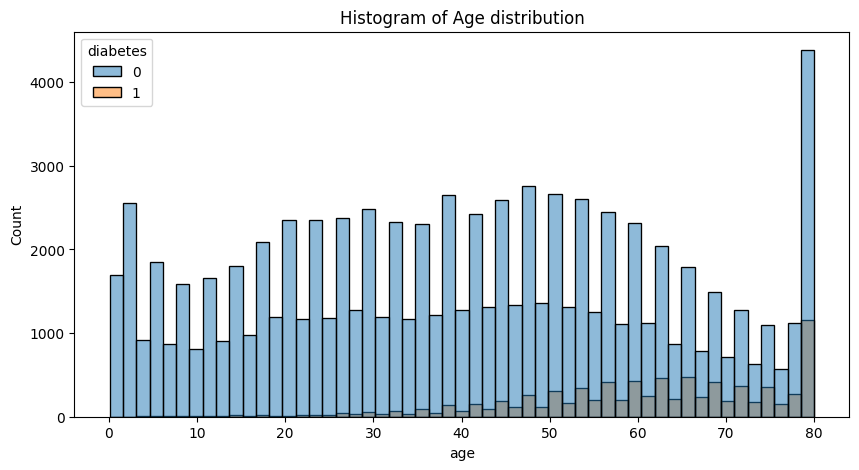

In [15]:
plt.figure(figsize=(10, 5))
plt.title('Histogram of Age distribution')
sns.histplot(x='age', hue='diabetes', data=diabetes_df)
plt.show()

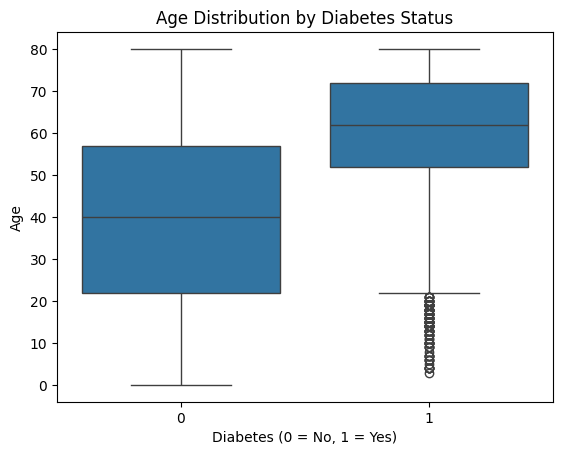

In [16]:
# Age distribution in relation to diabetes

sns.boxplot(x='diabetes', y='age', data=diabetes_df)
plt.title('Age Distribution by Diabetes Status')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

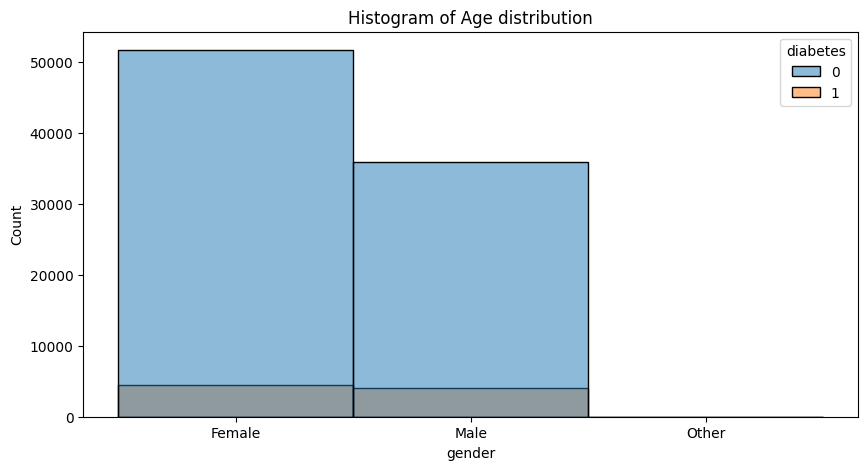

In [17]:
plt.figure(figsize=(10, 5))
plt.title('Histogram of Age distribution')
sns.histplot(x='gender', hue='diabetes', data=diabetes_df)
plt.show()

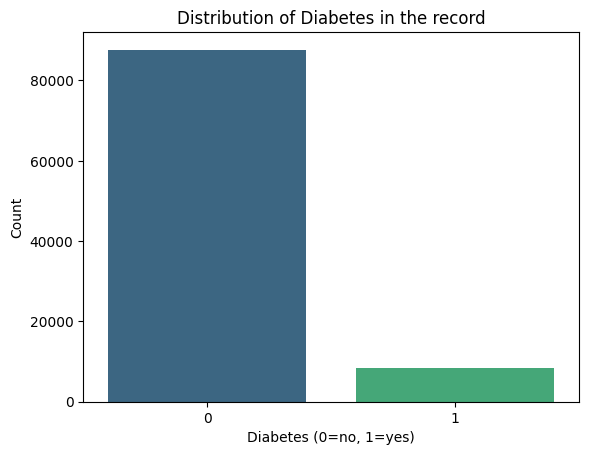

In [18]:
#countplot for the target variable

sns.countplot(x='diabetes', data=diabetes_df, palette='viridis')
plt.title('Distribution of Diabetes in the record')
plt.xlabel('Diabetes (0=no, 1=yes)')
plt.ylabel('Count')
plt.show()


The distribution above indicates class imbalance which will be attended to in the data preparation steps

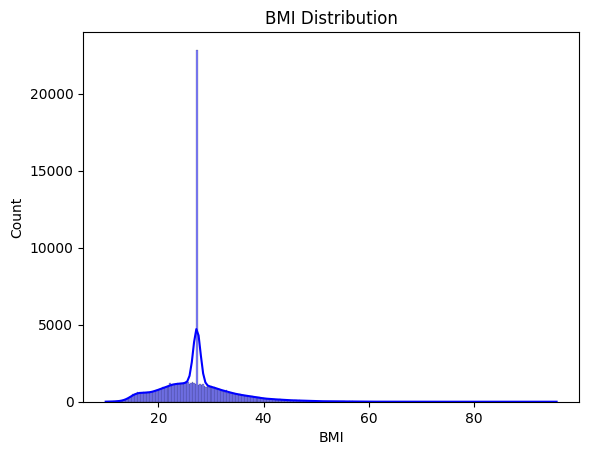

In [19]:
# BMI distribution towards diabetes

sns.histplot(diabetes_df['bmi'], color='blue', kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')

plt.show()


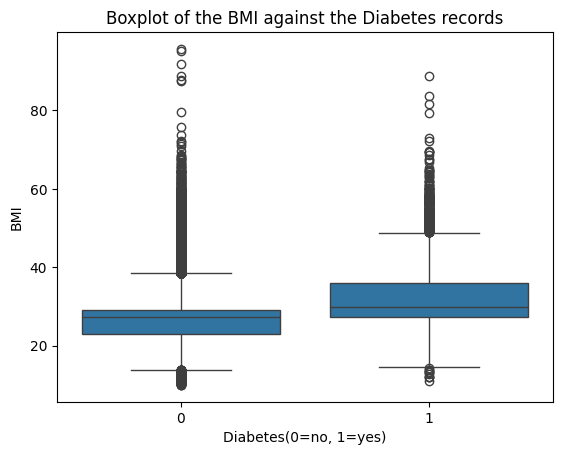

In [20]:
sns.boxplot(x='diabetes', y='bmi', data=diabetes_df)
plt.title('Boxplot of the BMI against the Diabetes records')
plt.xlabel('Diabetes(0=no, 1=yes)')
plt.ylabel('BMI')
plt.show()


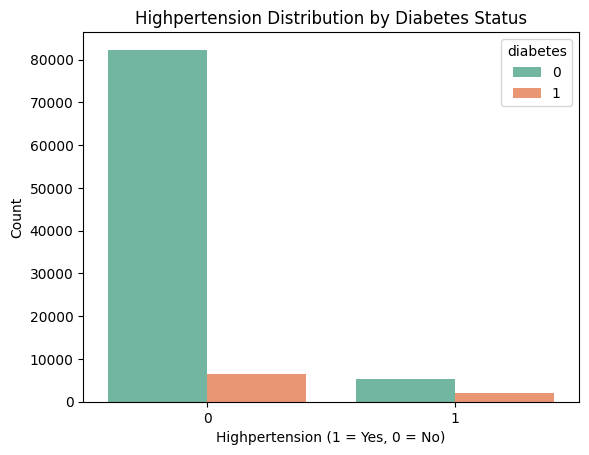

In [21]:
# Countplot for HighBP
sns.countplot(x='hypertension', hue='diabetes', data=diabetes_df, palette='Set2')
plt.title('Highpertension Distribution by Diabetes Status')
plt.xlabel('Highpertension (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()



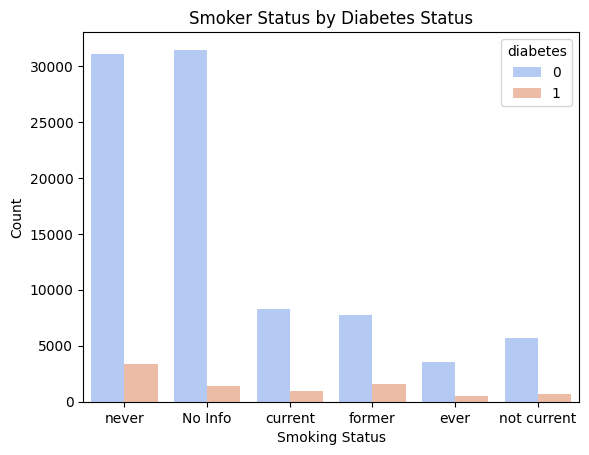

In [22]:



# Smoker status vs Diabetes
sns.countplot(x='smoking_history', hue='diabetes', data=diabetes_df, palette='coolwarm')
plt.title('Smoker Status by Diabetes Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

In [23]:
# encode the gender and smoking_history column

label = LabelEncoder()

diabetes_df['gender'] = label.fit_transform(diabetes_df['gender'])
diabetes_df['smoking_history'] = label.fit_transform(diabetes_df['smoking_history'])

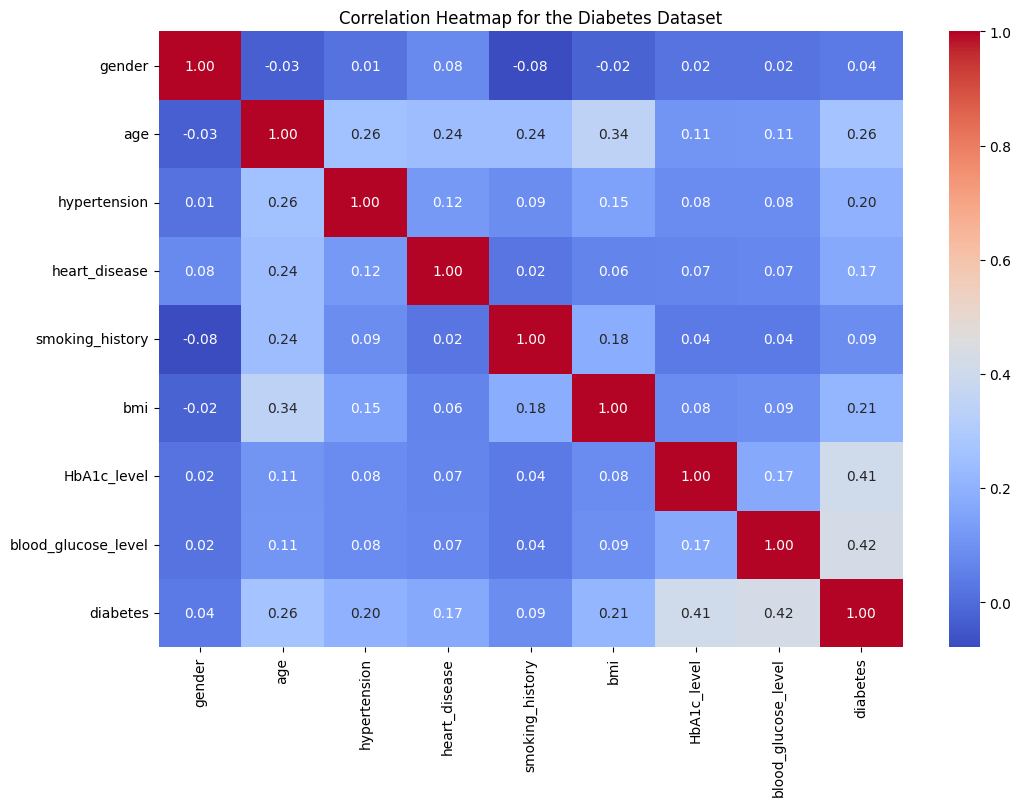

In [24]:
# plot the correlation heatmap
correlation_heatmap = diabetes_df.corr()
plt.figure(figsize=(12,8))
plt.title('Correlation Heatmap for the Diabetes Dataset')
sns.heatmap(correlation_heatmap, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

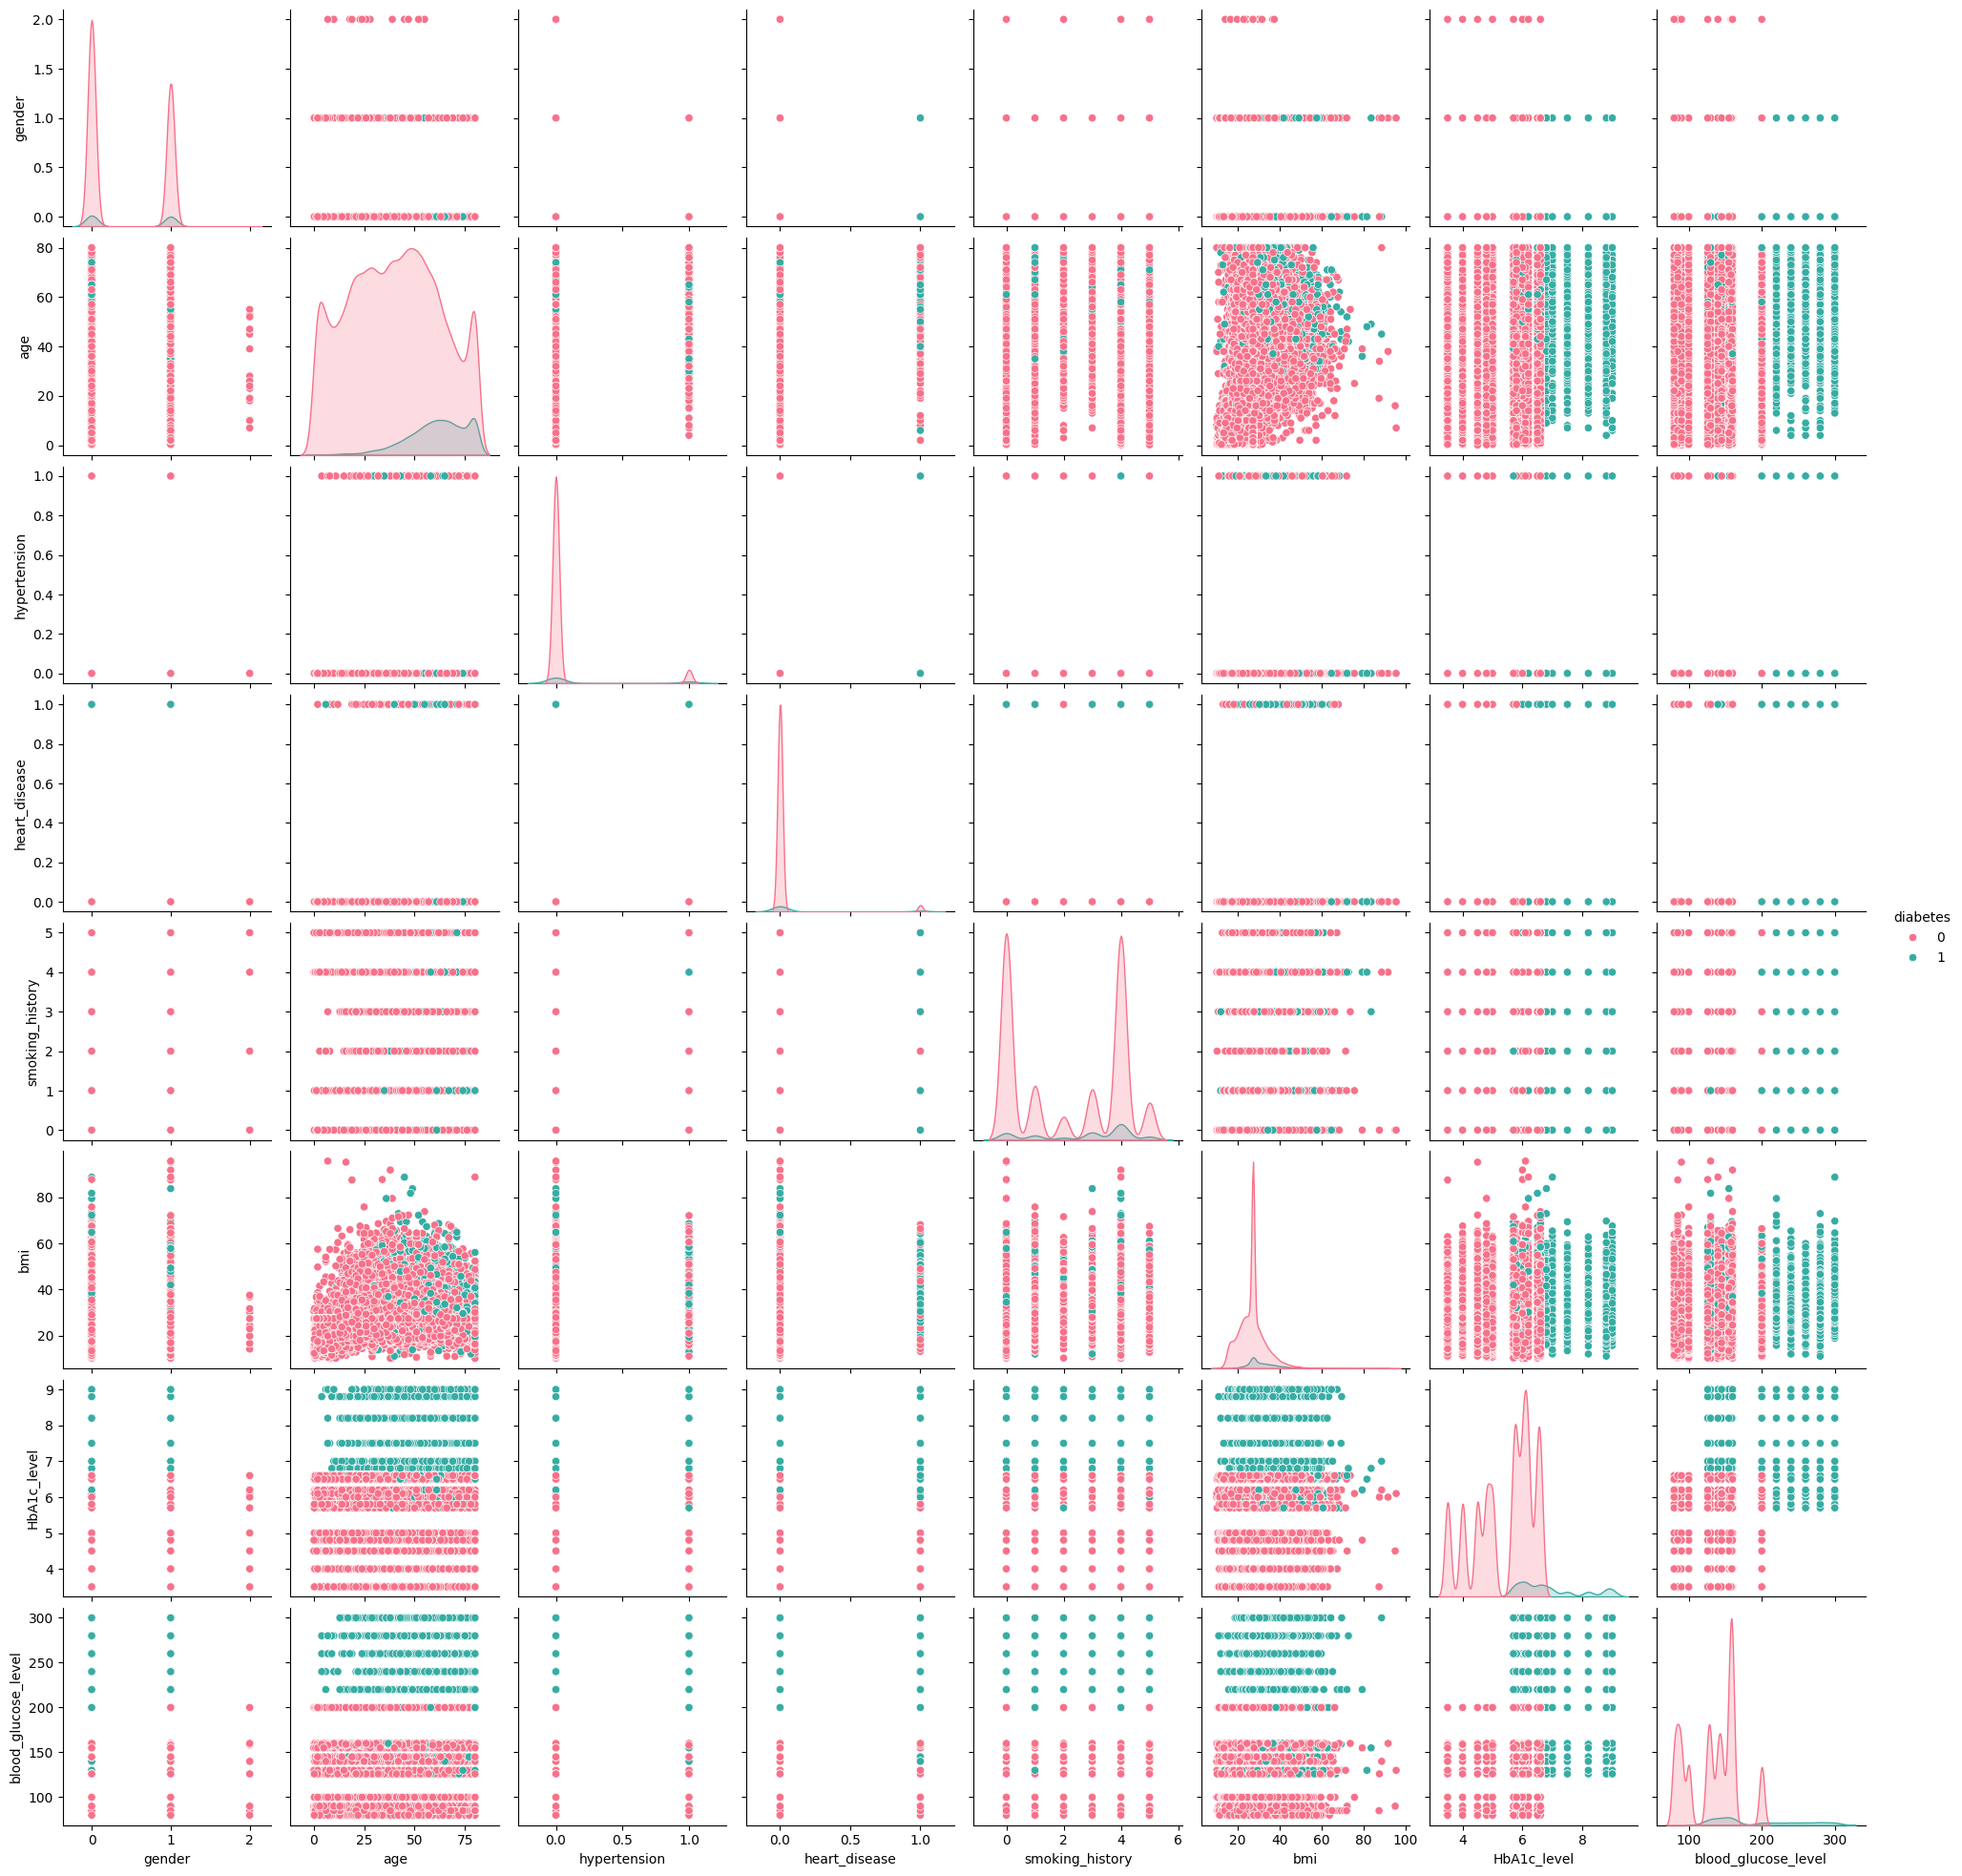

In [25]:
# plot the Pairplot of related features


sns.pairplot(diabetes_df, hue='diabetes', palette='husl')
plt.show()

In [26]:
# extract the processed dataframe into a CSV file to be prepared for model training
diabetes_df.to_csv('diabetes_cleaned.csv')